## Regresión Lineal

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('houses.csv')

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
X = datos[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = datos['Price']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
modelo = LinearRegression()

In [9]:
modelo.fit(X_train, y_train) 

LinearRegression()

In [11]:
y_pred = modelo.predict(X_test)
y_pred

array([1437332.41812776, 1544592.31469038, 1712490.31897134,
       1079392.1233587 , 1281689.07000456,  686211.62022548,
       1162945.04738375, 1306267.91918594, 1551291.92463591,
       1359346.53031843, 1392357.275958  , 1230069.71397145,
       1091773.52995136,  505503.64366178, 1252064.03292432,
       1771112.44295977, 1570082.96458057, 1545491.90435641,
        960310.18416967, 1027424.75329007,  660689.15026301,
        738645.2000364 ,  946660.83242718,  603809.2789027 ,
       1579108.78116986, 1770980.96303663, 1431922.46852383,
       1457143.83455276, 1095709.60459958, 1820154.4479731 ,
       1600096.25821116, 1212372.99901289,  736183.78213946,
       1075650.17822423,  780014.33487236,  927203.07500669,
       1334074.13643592, 1502991.39320629,  806662.81294656,
        618734.40359532,  904466.53305844,  997191.43281786,
       1198496.9958904 , 1251935.44665959, 1814614.97477062,
       1327430.91081879, 1048847.30490747,  859773.17700009,
       1146962.60109622,

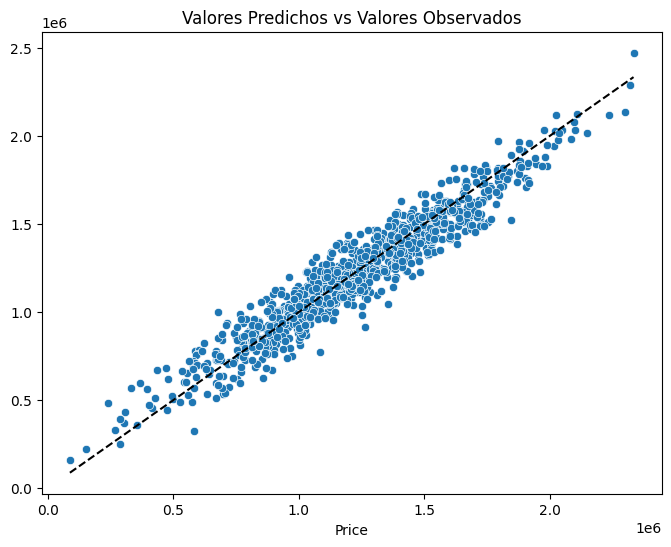

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Valores Predichos vs Valores Observados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.show()

## Regresion logistica


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
datos = load_breast_cancer()

In [20]:
X = datos.data
y = datos.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
modelo = LogisticRegression()

In [23]:
modelo.fit(X_train, y_train)

c:\Users\odstr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_proba = modelo.predict_proba(X_test)
y_pred = modelo.predict(X_test)

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

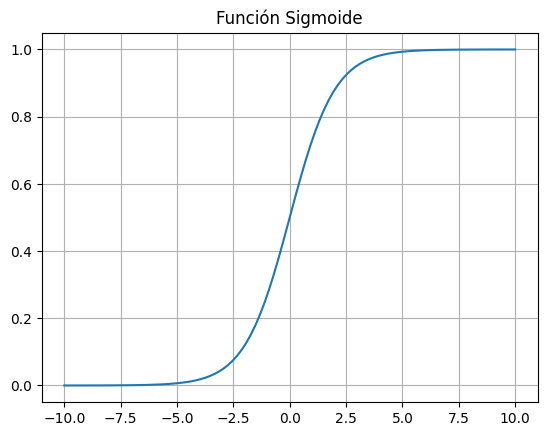

In [28]:
x_values = np.linspace(-10, 10, 100)
y_values = sigmoide(x_values)
plt.plot(x_values, y_values)
plt.title('Función Sigmoide')
plt.grid(True)
plt.show()

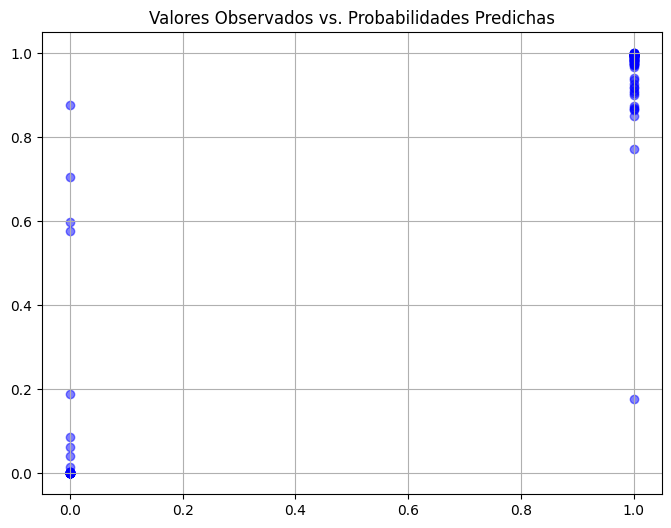

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_proba[:, 1], color='blue', alpha=0.5)
plt.title('Valores Observados vs. Probabilidades Predichas')
plt.grid(True)
plt.show()

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_proba[:, 1])


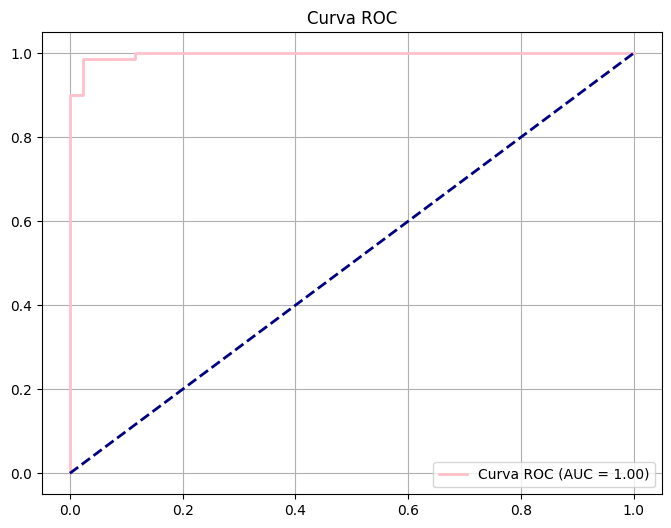

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Conclusiones


Estos modelos ya habian sido analizados previamente, en dichos habiamos calculado la probabilidad y evualuado que tan bueno eran los modelos, tambien habiamos graficado, pero no habiamos visto bien del todo era el modelo, en la regresion lineal, obsevamos como casi todos los datos se acercan a la linea la cual es la referencia del exito que se esperaba y notamos pocos datos outliers, al igual que en la regresion logistica, se acerca demasiado a lo esperado, lo cual muestra lo bueno que es el modelo, aunque hay que recordar que esto se deba a que son modelos muy controlados, hechos para practicar, aun asi conocer estas herramientas nos ayudan a ver de una manera mas "grafica" la eficiencia del modelo.